In [ ]:
# Download required packages
import pandas as pd
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# Use the CIFAR-10 image data in deel learning
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.cifar10.load_data()

In [ ]:
# Check the array of the training dataset
print(train_input.shape, train_target.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
train_target

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# Check the array of the test dataset
print(test_input.shape, test_target.shape)

(10000, 32, 32, 3) (10000, 1)


* 60000 images in total (Training: 50k, Test: 10k)
* 32 x 32 x 3 (Width * Height * RGB, The range of value is 0 ~ 255)
* 0~9, 10 classes in total

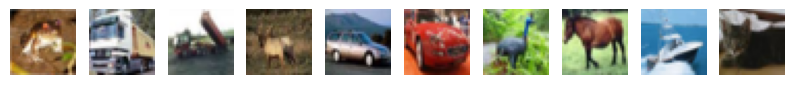

In [ ]:
# Print out a few of sample pictures
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
# Check targets of the above 10 samples
print([train_target[i][0] for i in range(10)])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [ ]:
# Check the number of samples per label using np.unique
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


## **Check the score when classifying cars using logistic regression**

In [ ]:
# Scale the train and target datasets
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 32*32*3)
test_scaled = test_input / 255.0
test_scaled = test_scaled.reshape(-1, 32*32*3)

print(train_scaled.shape)
print(test_scaled.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
# Convert target values from a 2D numpy array to a 1D array using the ravel() method.
train_target = train_target.ravel()
test_target = test_target.ravel()

In [ ]:
# Use the SGDClassifier class and the cross_validate function to check the performance of cross-validation on the data.
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0.27402


I got a poor score: 0.27402

## **1. Neural Networks (NN)**

In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(40000, 3072) (40000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(10000, 3072) (10000,)


In [ ]:
# Create a dense layer
dense = keras.layers.Dense(10, activation='softmax', input_shape=(3072,))

# Create a neural network model
model = keras.Sequential(dense)

In [ ]:
# Prepare a model
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# Check the first 10 samples of targets
print(train_target[:10])

[6 2 5 6 3 3 8 3 3 0]


In [ ]:
# Train the model on the training set
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1967 - accuracy: 0.2645
Epoch 2/5
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0912 - accuracy: 0.3027
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0615 - accuracy: 0.3160
Epoch 4/5
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0445 - accuracy: 0.3210
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0254 - accuracy: 0.3327


In [ ]:
# Check the performance of the validation set
model.evaluate(val_scaled, val_target)

# The model seems to be overfitting the validation dataset.

313/313 [==============================] - 1s 2ms/step - loss: 2.0553 - accuracy: 0.2937


[2.055310010910034, 0.2937000095844269]

# **2. Depp Neural Networks (DNN)**

In [ ]:
# Create a hidden layer using the sigmoid activation function and an output layer using the softmax function with Keras' Dense class
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(3072,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
# Create a deep neural network model by adding hidden layers
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               307300    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308310 (1.18 MB)
Trainable params: 308310 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# The accuracy improved by 0.090 compared to the previous artificial neural network model. (0.332 -> 0.422)

Epoch 1/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9132 - accuracy: 0.3101
Epoch 2/5
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7608 - accuracy: 0.3748
Epoch 3/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6980 - accuracy: 0.3965
Epoch 4/5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6576 - accuracy: 0.4107
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6285 - accuracy: 0.4220


## **Relu Function**

The ReLU function compensates for the drawbacks of the sigmoid function.

In [ ]:
# Instead of using reshape() for data dimension transformation, use Keras' Flatten().
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Check the model's summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               307300    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308310 (1.18 MB)
Trainable params: 308310 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Now let's prepare the training data again and train the model
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.cifar10.load_data()
train_scaled = train_input / 255.0
train_target = train_target.ravel()
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# Compiling and training the model is the same as before
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9972 - accuracy: 0.2905
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7792 - accuracy: 0.3684
Epoch 3/5
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7151 - accuracy: 0.3873
Epoch 4/5
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6790 - accuracy: 0.4008
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6522 - accuracy: 0.4103


In [ ]:
# Check the performance on the validation set as well.
model.evaluate(val_scaled, val_target)

313/313 [==============================] - 1s 4ms/step - loss: 1.7729 - accuracy: 0.3620


[1.7728849649429321, 0.3619999885559082]

## **Optimizer**

Improve the model's performance by using an optimizer

In [ ]:
# 1. Use the SGD optimizer with momentum optimization and Nesterov accelerated gradient
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# Final accuracy: 0.432

Epoch 1/5
1250/1250 [==============================] - 9s 6ms/step - loss: 1.6542 - accuracy: 0.4115
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6281 - accuracy: 0.4180
Epoch 3/5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6112 - accuracy: 0.4254
Epoch 4/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6031 - accuracy: 0.4271
Epoch 5/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5806 - accuracy: 0.4326


In [ ]:
# 2. Adagrad optimizer
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# Final accuracy: 0.501

Epoch 1/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4261 - accuracy: 0.4932
Epoch 2/5
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4115 - accuracy: 0.5000
Epoch 3/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4060 - accuracy: 0.5015
Epoch 4/5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4027 - accuracy: 0.5019
Epoch 5/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4002 - accuracy: 0.5019


In [ ]:
# 3. RMSprop Optimizer
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# Final accuracy: 0.459

Epoch 1/5
1250/1250 [==============================] - 11s 8ms/step - loss: 1.5665 - accuracy: 0.4472
Epoch 2/5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5501 - accuracy: 0.4496
Epoch 3/5
1250/1250 [==============================] - 9s 8ms/step - loss: 1.5374 - accuracy: 0.4546
Epoch 4/5
1250/1250 [==============================] - 9s 8ms/step - loss: 1.5347 - accuracy: 0.4581
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5226 - accuracy: 0.4599


In [ ]:
# 4. Adam Optimizer (learning rate=0.001 instead of 0.01)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# Final accuracy: 0.480

Epoch 1/5
1250/1250 [==============================] - 14s 10ms/step - loss: 1.4867 - accuracy: 0.4689
Epoch 2/5
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4770 - accuracy: 0.4710
Epoch 3/5
1250/1250 [==============================] - 12s 9ms/step - loss: 1.4750 - accuracy: 0.4744
Epoch 4/5
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4670 - accuracy: 0.4748
Epoch 5/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4558 - accuracy: 0.4801


In [ ]:
# Check the score of the validation set
model.evaluate(val_scaled, val_target)

313/313 [==============================] - 1s 4ms/step - loss: 1.6042 - accuracy: 0.4366


[1.60420823097229, 0.436599999666214]

# **3. Neural Network Model**

In [ ]:
#  Create a function to add layers to a Keras Sequential model
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(32,32,3)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
# call model_fn() without needing to separately add layers
model = model_fn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               307300    
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308310 (1.18 MB)
Trainable params: 308310 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Assign the fit results of the model's training data to 'history'
# Increase the epochs to 20 and then visualize the loss and accuracy graphs.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # verbose=0: suppress the progress bar during model training
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


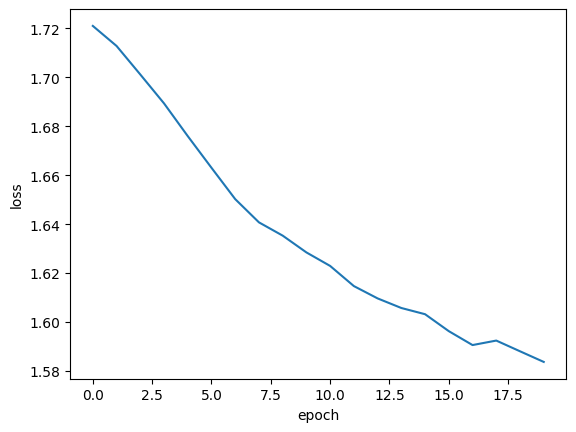

In [ ]:
# visualize the loss and accuracy over 20 epochs using matplotlib
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

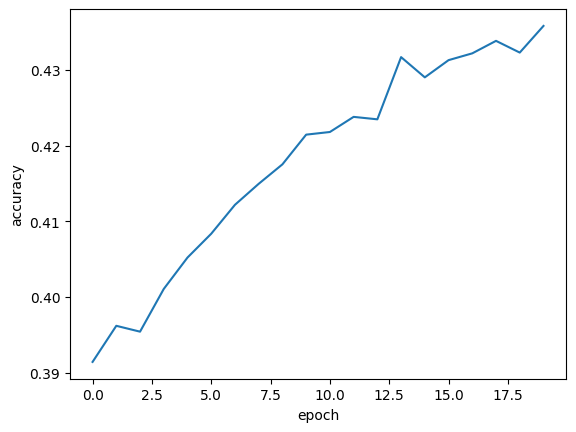

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## **Validation Loss**

In [ ]:
# Add validation data to the model training
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


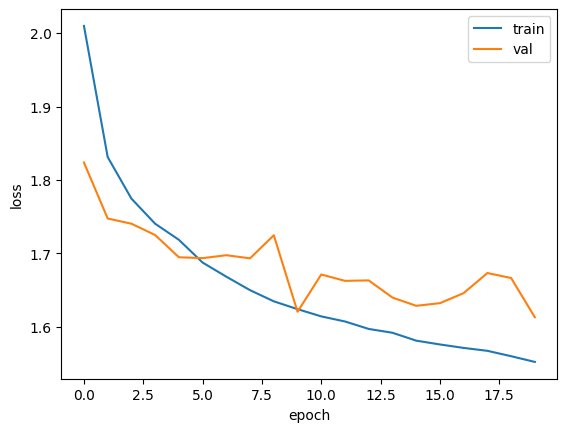

In [ ]:
# Plot the training loss and validation loss on the same graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- The loss consistently decreases until the 10th epoch.
- Overfitting seems to occur after the 10th epoch.

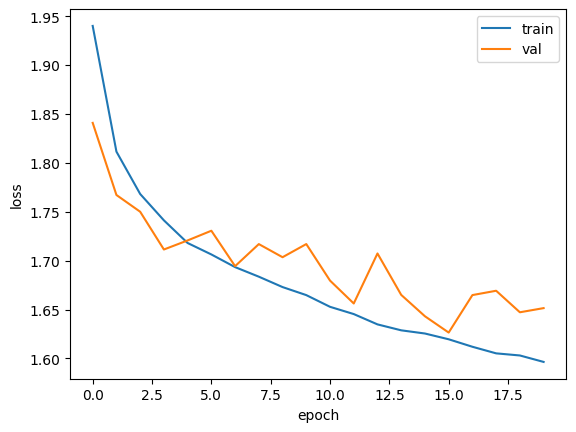

In [ ]:
#  Use the Adam optimizer to further reduce the loss
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- The loss consistently decreases for both the training and validation sets until the 16th epoch.
- Overfitting is somewhat alleviated compared to before.